---
sidebar_label: Google Gemini
---

# ChatGoogleGenerativeAI

Access Google's Generative AI models, including the Gemini family, directly via the Gemini API or experiment rapidly using Google AI Studio. The `langchain-google-genai` package provides the LangChain integration for these models. This is often the best starting point for individual developers.

For information on the latest models, their features, context windows, etc. head to the [Google AI docs](https://ai.google.dev/gemini-api/docs/models/gemini). All model ids can be found in the [Gemini API docs](https://ai.google.dev/gemini-api/docs/models).

### Integration details

| Class | Package | Local | Serializable | [JS support](https://js.langchain.com/docs/integrations/chat/google_generativeai) | Package downloads | Package latest |
| :--- | :--- | :---: | :---: |  :---: | :---: | :---: |
| [ChatGoogleGenerativeAI](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html) | [langchain-google-genai](https://python.langchain.com/api_reference/google_genai/index.html) | ❌ | beta | ✅ | ![PyPI - Downloads](https://img.shields.io/pypi/dm/langchain-google-genai?style=flat-square&label=%20) | ![PyPI - Version](https://img.shields.io/pypi/v/langchain-google-genai?style=flat-square&label=%20) |

### Model features

| [Tool calling](/docs/how_to/tool_calling) | [Structured output](/docs/how_to/structured_output/) | JSON mode | [Image input](/docs/how_to/multimodal_inputs/) | Audio input | Video input | [Token-level streaming](/docs/how_to/chat_streaming/) | Native async | [Token usage](/docs/how_to/chat_token_usage_tracking/) | [Logprobs](/docs/how_to/logprobs/) |
| :---: | :---: | :---: | :---: |  :---: | :---: | :---: | :---: | :---: | :---: |
| ✅ | ✅ | ❌ | ✅ | ✅ | ✅ | ✅ | ✅ | ✅ | ❌ |

### Setup

To access Google AI models you'll need to create a Google Account, get a Google AI API key, and install the `langchain-google-genai` integration package.

**1. Installation:**

In [23]:
# ติดตั้งแพ็คเกจ langchain-google-genai
%pip install -U langchain-google-genai

**2. Credentials:**

Head to [https://ai.google.dev/gemini-api/docs/api-key](https://ai.google.dev/gemini-api/docs/api-key) (or via Google AI Studio) to generate a Google AI API key.

### Chat Models

Use the `ChatGoogleGenerativeAI` class to interact with Google's chat models. See the [API reference](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html) for full details.


In [24]:
import getpass
import os

# ตรวจสอบว่ามี Google AI API key อยู่ในตัวแปรสภาพแวดล้อมหรือไม่
if "GOOGLE_API_KEY" not in os.environ:
    # ถ้าไม่มี ให้ขอ API key จากผู้ใช้
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

To enable automated tracing of your model calls, set your [LangSmith](https://docs.smith.langchain.com/) API key:

In [25]:
# กำหนดค่า LangSmith API key และเปิดใช้งานการติดตาม (Tracing)
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")
# os.environ["LANGSMITH_TRACING"] = "true"

## Instantiation

Now we can instantiate our model object and generate chat completions:

In [26]:
from langchain_google_genai import ChatGoogleGenerativeAI

# สร้างอินสแตนซ์ของ ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash", # ระบุโมเดลที่จะใช้
    temperature=0, # ควบคุมความสุ่มของผลลัพธ์ (0 คือสุ่มน้อยที่สุด)
    max_tokens=None, # กำหนดจำนวนโทเค็นสูงสุดในผลลัพธ์
    timeout=None, # กำหนดเวลาหมดอายุของการเรียก API
    max_retries=2, # กำหนดจำนวนครั้งสูงสุดในการลองใหม่เมื่อเกิดข้อผิดพลาด
    # พารามิเตอร์อื่นๆ...
)

## Invocation

In [27]:
# สร้างรายการข้อความสำหรับการสนทนา
messages = [
    (
        "system", # บทบาทของระบบ
        "You are a helpful assistant that translates English to Thai. Translate the user sentence.", # คำแนะนำสำหรับระบบ
    ),
    ("human", "I love programming."), # ข้อความจากผู้ใช้
]
# เรียกใช้โมเดลเพื่อสร้างการตอบสนอง
ai_msg = llm.invoke(messages)
# แสดงผลการตอบสนอง
ai_msg

AIMessage(content='ฉันรักการเขียนโปรแกรม (Chan rak gaan kian pro-graem)\n\nYou could also say:\n*   **ผมรักการเขียนโปรแกรม** (Phom rak gaan kian pro-graem) - If you are male.\n*   **ฉันรักโปรแกรมมิ่ง** (Chan rak pro-graem-ming) - Using the transliterated word for "programming," which is also very common.\n*   **ผมรักโปรแกรมมิ่ง** (Phom rak pro-graem-ming) - If you are male, using the transliterated word.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--144d24af-89fb-46cf-a4bf-2acef46b312e-0', usage_metadata={'input_tokens': 21, 'output_tokens': 815, 'total_tokens': 836, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 690}})

In [28]:
# พิมพ์เนื้อหาของการตอบสนองจาก AI
print(ai_msg.content)

ฉันรักการเขียนโปรแกรม (Chan rak gaan kian pro-graem)

You could also say:
*   **ผมรักการเขียนโปรแกรม** (Phom rak gaan kian pro-graem) - If you are male.
*   **ฉันรักโปรแกรมมิ่ง** (Chan rak pro-graem-ming) - Using the transliterated word for "programming," which is also very common.
*   **ผมรักโปรแกรมมิ่ง** (Phom rak pro-graem-ming) - If you are male, using the transliterated word.


## Chaining

We can [chain](/docs/how_to/sequence/) our model with a prompt template like so:

In [29]:
from langchain_core.prompts import ChatPromptTemplate

# สร้าง Prompt Template จากรายการข้อความ
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system", # บทบาทของระบบ
            "You are a helpful assistant that translates {input_language} to {output_language}. Respond in {output_language}.", # คำแนะนำสำหรับระบบ พร้อมตัวแปร
        ),
        ("human", "{input}"), # ข้อความจากผู้ใช้ พร้อมตัวแปร
    ]
)

# สร้าง Chain โดยเชื่อม Prompt Template กับโมเดล
chain = prompt | llm
# เรียกใช้ Chain ด้วยอินพุตที่กำหนด
chain.invoke(
    {
        "input_language": "English", # กำหนดภาษาอินพุต
        "output_language": "Thai", # กำหนดภาษาเอาท์พุต
        "input": "I love programming.", # ข้อความอินพุต
    }
)

AIMessage(content='ฉันรักการเขียนโปรแกรม', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--46680a49-fa81-43d1-9843-4982d69eac23-0', usage_metadata={'input_tokens': 20, 'output_tokens': 673, 'total_tokens': 693, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 667}})

## Multimodal Usage

Gemini models can accept multimodal inputs (text, images, audio, video) and, for some models, generate multimodal outputs.

### Image Input

Provide image inputs along with text using a `HumanMessage` with a list content format. Make sure to use a model that supports image input, such as `gemini-2.5-flash`.

In [30]:
import base64

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ตัวอย่างการใช้ URL สาธารณะ
message_url = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Describe the image at the URL.", # ข้อความคำสั่ง
        },
        {"type": "image_url", "image_url": "https://picsum.photos/seed/picsum/200/300"}, # URL ของรูปภาพ
    ]
)
# เรียกใช้โมเดลด้วยข้อความและรูปภาพจาก URL
result_url = llm.invoke([message_url])
# พิมพ์ผลลัพธ์
print(f"Response for URL image: {result_url.content}")

# ตัวอย่างการใช้ไฟล์รูปภาพในเครื่องที่เข้ารหัสแบบ base64
image_file_path = "/547412147_1112316334348370_4632701499238617736_n.jpg"

# เปิดไฟล์รูปภาพในโหมดไบนารีและอ่านเนื้อหา
with open(image_file_path, "rb") as image_file:
    # เข้ารหัสเนื้อหาเป็น base64 และถอดรหัสเป็นสตริง UTF-8
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

# สร้าง HumanMessage พร้อมข้อความและรูปภาพที่เข้ารหัส base64
message_local = HumanMessage(
    content=[
        {"type": "text", "text": "Describe the local image. (อธิบายภาพท้องถิ่นนี้)"}, # ข้อความคำสั่ง (มีภาษาไทยด้วย)
        {"type": "image_url", "image_url": f"data:image/png;base64,{encoded_image}"}, # รูปภาพที่เข้ารหัส base64
    ]
)
# เรียกใช้โมเดลด้วยข้อความและรูปภาพในเครื่อง
result_local = llm.invoke([message_local])
# พิมพ์ผลลัพธ์
print(f"Response for local image: {result_local.content}")

Response for URL image: The image depicts a majestic winter mountain landscape, likely at either sunrise or sunset, characterized by a striking contrast between warm and cool tones.

The upper two-thirds of the frame are dominated by a vast sky, painted with soft, ethereal hues of lavender, pale pink, and light orange, interspersed with wispy, scattered clouds that catch the low sunlight. The overall impression of the sky is one of serene beauty and expansive calm.

In the lower third of the image, a gentle, undulating expanse of snow-covered terrain stretches across the foreground and midground. This snow is primarily in shadow, appearing in deep, cool shades of blue and purple, suggesting the absence of direct sunlight.

To the right, a prominent, jagged mountain peak rises sharply. Its upper edges and a portion of its right face are brilliantly illuminated by the same warm, golden light that touches the clouds, creating a stark contrast with its lower slopes and shadowed crevices, w

Other supported `image_url` formats:
- A Google Cloud Storage URI (`gs://...`). Ensure the service account has access.
- A PIL Image object (the library handles encoding).

### Audio Input

Provide audio file inputs along with text.

In [31]:
import base64

from langchain_core.messages import HumanMessage

# ตรวจสอบให้แน่ใจว่ามีไฟล์เสียงชื่อ 'example_audio.mp3' หรือระบุพาธที่ถูกต้อง
audio_file_path = "/voice_เกษตรกรรมสุุนทรีย์3.wav"
audio_mime_type = "audio/mpeg"

# เปิดไฟล์เสียงในโหมดไบนารีและอ่านเนื้อหา
with open(audio_file_path, "rb") as audio_file:
    # เข้ารหัสเนื้อหาเป็น base64 และถอดรหัสเป็นสตริง UTF-8
    encoded_audio = base64.b64encode(audio_file.read()).decode("utf-8")

# สร้าง HumanMessage พร้อมข้อความและไฟล์เสียงที่เข้ารหัส base64
message = HumanMessage(
    content=[
        {"type": "text", "text": "Transcribe the audio."}, # ข้อความคำสั่ง
        {
            "type": "media",
            "data": encoded_audio,  # ใช้สตริง base64 โดยตรง
            "mime_type": audio_mime_type, # ระบุประเภท MIME ของไฟล์เสียง
        },
    ]
)
# เรียกใช้โมเดลด้วยข้อความและไฟล์เสียง
response = llm.invoke([message])  # ยกเลิกคอมเมนต์เพื่อรัน
# พิมพ์ผลลัพธ์
print(f"Response for audio: {response.content}")

Response for audio: สวัสดี ค่ะ ทุก คน วัน นี้ มา เจอ กับ นัก เล่า เรื่อง สาว ชาว สวน คน นี้ อีก แล้ว นะ คะ วัน นี้ เรา จะ มา คุย กัน ใน หัว ข้อ ที่ น่า สน ใจ มาก ๆ เกี่ยว กับ เกษตรกรรม สุนทรี ความ ร่ำ รวย ทาง ระบบ นิเวศ ฟัง ดู ดี ใช่ ไหม ล่ะ คะ แต่ เดี๋ยว ก่อน อย่า เพิ่ง คิด ว่า มัน จะ ยาก นะ เพราะ เรา จะ มา เล่า ให้ ฟัง แบบ ง่าย ๆ สบาย ๆ สไตล์ ชาว บ้าน เลย ค่ะ เกริ่น นำ เคย ไหม คะ ที่ รู้ สึก ว่า ทำ เกษตร แล้ว มัน เหนื่อย จัง ต้อง รด น้ำ ทุก วัน แถม ปุ๋ย ก็ แพง แสน แพง แต่ รู้ ไหม คะ ว่า จริง ๆ แล้ว ธรรมชาติ มี เคล็ด ลับ ดี ๆ ที่ จะ ช่วย ให้ เรา ประหยัด ทั้ง แรง ประหยัด ทั้ง เงิน แถม ยัง ทำ ให้ ดิน ของ เรา อุดม สมบูรณ์ ขึ้น ด้วย เนื้อ หา เคล็ด ลับ นั้น ก็ คือ อินทรีย์ วัตถุ ใน ดิน ค่ะ หรือ ที่ เรียก กัน ง่าย ๆ ว่า พวก เศษ ซาก พืช ซาก สัตว์ ที่ มัน เน่า เปื่อย ผุ พัง ลง ไป อยู่ ใน ดิน นั่น แหละ ค่ะ เจ้า อินทรีย์ วัตถุ นี่ แหละ ค่ะ ที่ จะ เป็น ตัว ช่วย สำคัญ ใน การ สร้าง สิ่ง ที่ เรียก ว่า ธนาคาร น้ำ ให้ กับ ดิน ของ เรา แล้ว ธนาคาร น้ำ นี่ มัน ดี ยัง ไง ขอ บอก เลย ว่า ดี มาก ๆ ค่ะ เพราะ

In [32]:
from google.colab import drive
# เชื่อมต่อ Google Drive เข้ากับ Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Video Input

Provide video file inputs along with text.

In [48]:
import base64

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ตรวจสอบให้แน่ใจว่ามีไฟล์วิดีโอชื่อ 'example_video.mp4' หรือระบุพาธที่ถูกต้อง
video_file_path = "/พิมพ์เขียวเพื่อความอยู่รอด.mp4"
video_mime_type = "video/mp4"

# เปิดไฟล์วิดีโอในโหมดไบนารีและอ่านเนื้อหา
with open(video_file_path, "rb") as video_file:
    # เข้ารหัสเนื้อหาเป็น base64 และถอดรหัสเป็นสตริง UTF-8
    encoded_video = base64.b64encode(video_file.read()).decode("utf-8")

# สร้าง HumanMessage พร้อมข้อความและไฟล์วิดีโอที่เข้ารหัส base64
message = HumanMessage(
    content=[
        {"type": "text", "text": "Describe the first few frames of the video."}, # ข้อความคำสั่ง
        {
            "type": "media",
            "data": encoded_video,  # ใช้สตริง base64 โดยตรง
            "mime_type": video_mime_type, # ระบุประเภท MIME ของไฟล์วิดีโอ
        },
    ]
)
# เรียกใช้โมเดลด้วยข้อความและไฟล์วิดีโอ
response = llm.invoke([message])  # ยกเลิกคอมเมนต์เพื่อรัน
# พิมพ์ผลลัพธ์
print(f"Response for video: {response.content}")

Response for video: Okay, here's a description of the first few frames of the video:

The video starts with a title card, with the title reading “พิมพ์เขียวเพื่อความอยู่รอด” (which, according to Google Translate, means “Blueprint for Survival”) in the center. There is a logo that reads “NotebookLM” above the title. Below the title there is a design containing an image of a tree, with the roots exposed, placed between two white rectangles. 

The next frame shows a white dialogue box with a quote that reads “รู้ไหม… เรากำลังจะไม่มีน้ำกิน” (“Did you know… we are about to run out of water”). 

The third frame is a question, “เรามาถึงจุดนี้ได้อย่างไร และ จะมีทางกลับหรือไม่?” (“How did we get here and is there a way back?”) with a light blue question mark above the text.


### Image Generation (Multimodal Output)

Certain models (such as `gemini-2.0-flash-preview-image-generation`) can generate text and images inline. You need to specify the desired `response_modalities`. See more information on the [Gemini API docs](https://ai.google.dev/gemini-api/docs/image-generation) for details.

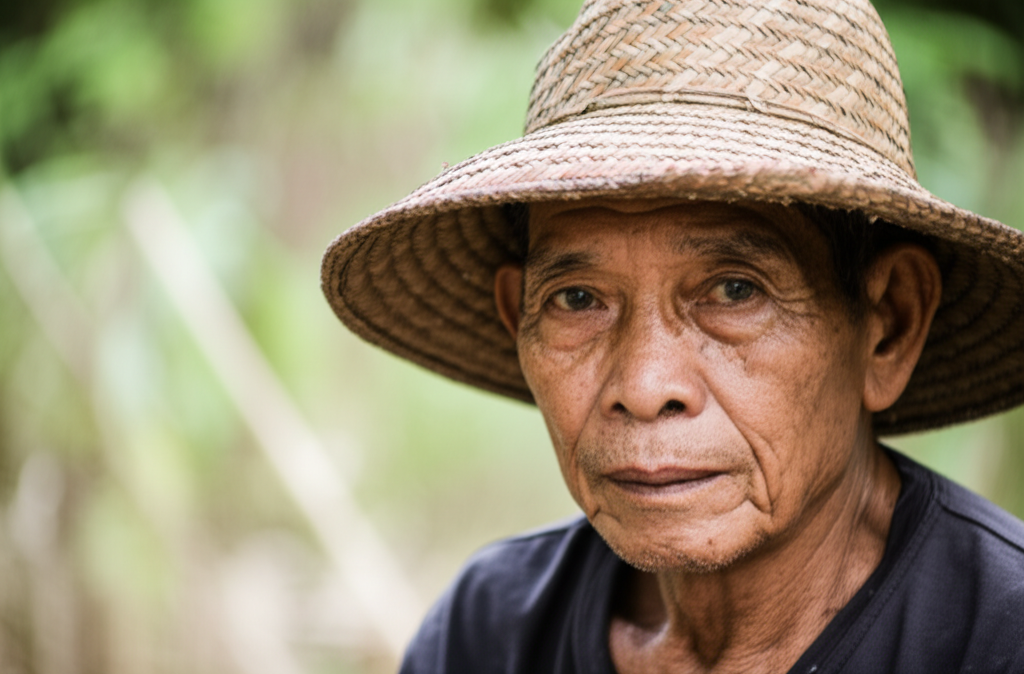

In [49]:
import base64

from IPython.display import Image, display
from langchain_core.messages import AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# สร้างอินสแตนซ์ของ ChatGoogleGenerativeAI สำหรับการสร้างรูปภาพ
llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-preview-image-generation")

# สร้างข้อความคำสั่งเพื่อสร้างรูปภาพ
message = {
    "role": "user",
    "content": "Generate a photorealistic image of a ole thaiman wearing a hat.",
}

# เรียกใช้โมเดลเพื่อสร้างรูปภาพ โดยระบุ modalities ที่ต้องการ (TEXT และ IMAGE)
response = llm.invoke(
    [message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

# ฟังก์ชันสำหรับดึงข้อมูล base64 ของรูปภาพจาก response
def _get_image_base64(response: AIMessage) -> None:
    image_block = next(
        block
        for block in response.content
        if isinstance(block, dict) and block.get("image_url")
    )
    return image_block["image_url"].get("url").split(",")[-1]

# ดึงข้อมูล base64 ของรูปภาพ
image_base64 = _get_image_base64(response)
# แสดงรูปภาพที่ถอดรหัสจาก base64
display(Image(data=base64.b64decode(image_base64), width=300))

### Image and text to image

You can iterate on an image in a multi-turn conversation, as shown below:

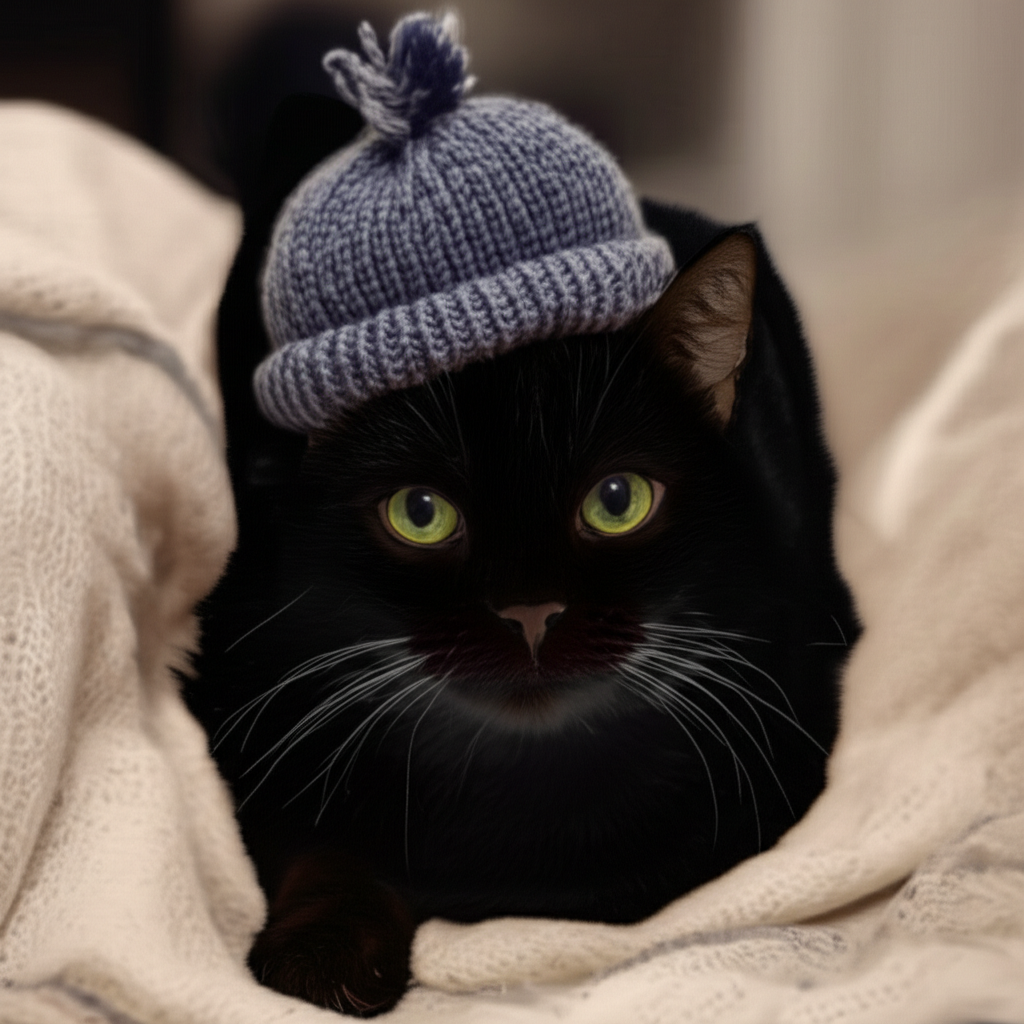

In [35]:
# สร้างข้อความคำสั่งถัดไปเพื่อแก้ไขรูปภาพ
next_message = {
    "role": "user",
    "content": "Can you take the same image and make the cat black?",
}

# เรียกใช้โมเดลอีกครั้ง โดยส่งข้อความเดิม, response ก่อนหน้า และข้อความใหม่ เพื่อแก้ไขรูปภาพ
response = llm.invoke(
    [message, response, next_message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

# ดึงข้อมูล base64 ของรูปภาพที่แก้ไขแล้ว
image_base64 = _get_image_base64(response)
# แสดงรูปภาพที่แก้ไขแล้ว
display(Image(data=base64.b64decode(image_base64), width=300))

You can also represent an input image and query in a single message by encoding the base64 data in the [data URI scheme](https://en.wikipedia.org/wiki/Data_URI_scheme):

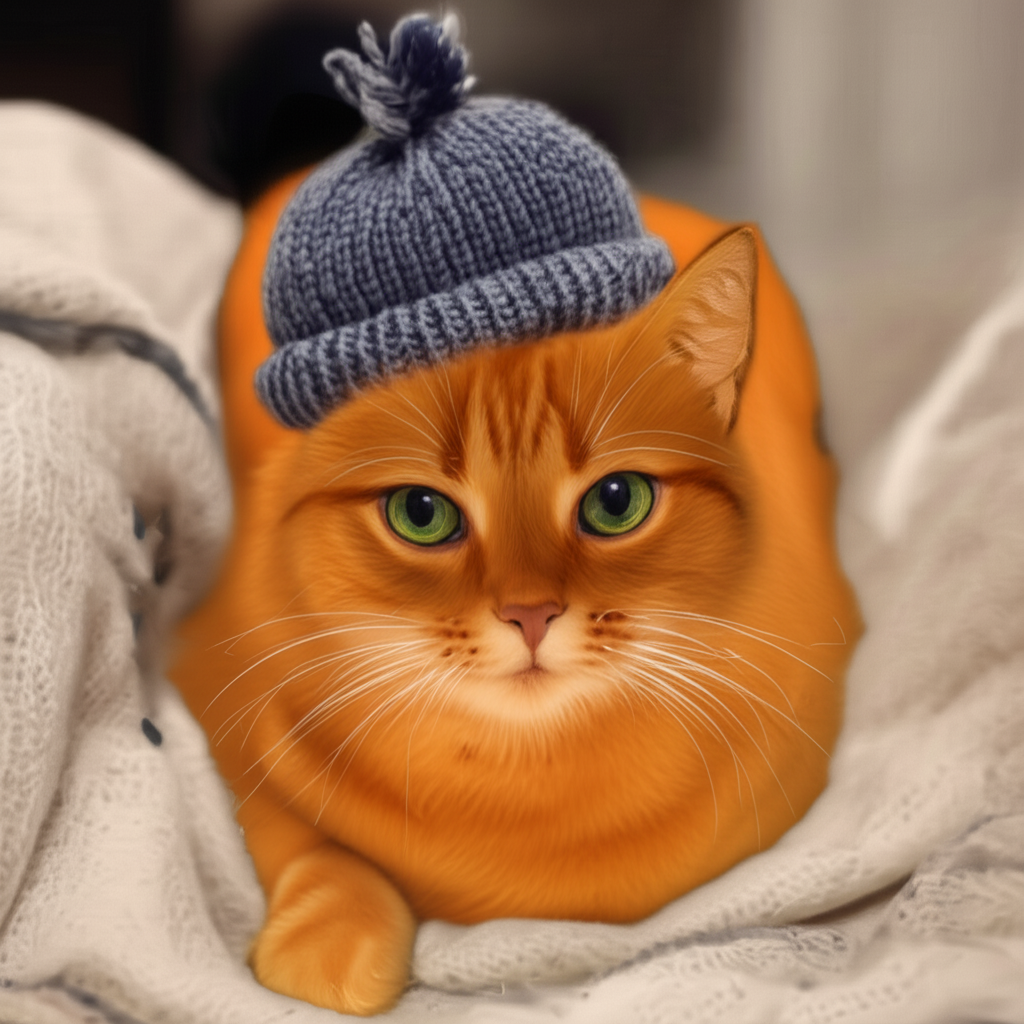

In [36]:
# สร้างข้อความคำสั่งพร้อมรูปภาพที่เข้ารหัส base64 ในรูปแบบ data URI scheme
message = {
    "role": "user",
    "content": [
        {
            "type": "text",
            "text": "Can you make this cat orange?", # ข้อความคำสั่ง
        },
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/png;base64,{image_base64}"}, # รูปภาพที่เข้ารหัส base64 ในรูปแบบ data URI
        },
    ],
}

# เรียกใช้โมเดลด้วยข้อความและรูปภาพ
response = llm.invoke(
    [message],
    generation_config=dict(response_modalities=["TEXT", "IMAGE"]),
)

# ดึงข้อมูล base64 ของรูปภาพที่แก้ไขแล้ว
image_base64 = _get_image_base64(response)
# แสดงรูปภาพที่แก้ไขแล้ว
display(Image(data=base64.b64decode(image_base64), width=300))

You can also use LangGraph to manage the conversation history for you as in [this tutorial](/docs/tutorials/chatbot/).

## Tool Calling

You can equip the model with tools to call.

In [44]:
from langchain_core.tools import tool
from langchain_google_genai import ChatGoogleGenerativeAI


# กำหนด Tool สำหรับดึงข้อมูลสภาพอากาศ
@tool(description="Get the current weather in a given location")
def get_weather(location: str) -> str:
    return "It's sunny."


# สร้างอินสแตนซ์ของโมเดลและผูก Tool เข้ากับโมเดล
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
llm_with_tools = llm.bind_tools([get_weather])

# เรียกใช้โมเดลด้วยคำถามที่ควรจะเรียกใช้ Tool
query = "What's the weather in กรุงเทพมหานคร?"
ai_msg = llm_with_tools.invoke(query)

# ตรวจสอบการเรียกใช้ Tool ในการตอบสนอง
print(ai_msg.tool_calls)

# ตัวอย่างข้อความ Tool call ที่จำเป็นต้องใช้หากต้องการรัน Tool จริงๆ
from langchain_core.messages import ToolMessage

# สร้าง ToolMessage จากผลลัพธ์ของ Tool call
tool_message = ToolMessage(
    content=get_weather(*ai_msg.tool_calls[0]["args"]),
    tool_call_id=ai_msg.tool_calls[0]["id"],
)
# ตัวอย่างการส่งผลลัพธ์ของ Tool กลับไปยังโมเดล
llm_with_tools.invoke([ai_msg, tool_message])

[{'name': 'get_weather', 'args': {'location': 'กรุงเทพมหานคร'}, 'id': '796c31df-3825-4681-ab48-4598e4c42dfc', 'type': 'tool_call'}]


AIMessage(content='Okay, the weather in กรุงเทพมหานคร is sunny.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--b4b94ed5-a172-48a6-b0d8-65ed3d31650c-0', usage_metadata={'input_tokens': 36, 'output_tokens': 16, 'total_tokens': 52, 'input_token_details': {'cache_read': 0}})

## Structured Output

Force the model to respond with a specific structure using Pydantic models.

In [38]:
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_google_genai import ChatGoogleGenerativeAI


# กำหนดโครงสร้างข้อมูลที่ต้องการโดยใช้ Pydantic model
class Person(BaseModel):
    """Information about a person."""

    name: str = Field(..., description="The person's name") # ฟิลด์ชื่อ
    height_m: float = Field(..., description="The person's height in meters") # ฟิลด์ส่วนสูงเป็นเมตร


# สร้างอินสแตนซ์ของโมเดล
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0)
# ผูกโมเดลกับโครงสร้างข้อมูลที่ต้องการให้ตอบสนอง
structured_llm = llm.with_structured_output(Person)

# เรียกใช้โมเดลด้วยคำถามที่ต้องการข้อมูลในรูปแบบที่มีโครงสร้าง
result = structured_llm.invoke(
    "Who was the 16th president of the USA, and how tall was he in meters?"
)
# พิมพ์ผลลัพธ์
print(result)

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


name='Abraham Lincoln' height_m=1.93




## Token Usage Tracking

Access token usage information from the response metadata.

In [39]:
from langchain_google_genai import ChatGoogleGenerativeAI

# สร้างอินสแตนซ์ของโมเดล
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

# เรียกใช้โมเดลด้วยคำถาม
result = llm.invoke("Explain the concept of prompt engineering in one sentence.")

# พิมพ์เนื้อหาของการตอบสนอง
print(result.content)
# พิมพ์ข้อมูลการใช้งานโทเค็น
print("\nUsage Metadata:")
print(result.usage_metadata)

Prompt engineering is the art and science of crafting effective text prompts that guide large language models to generate desired outputs.

Usage Metadata:
{'input_tokens': 10, 'output_tokens': 23, 'total_tokens': 33, 'input_token_details': {'cache_read': 0}}


## Built-in tools

Google Gemini supports a variety of built-in tools ([google search](https://ai.google.dev/gemini-api/docs/grounding/search-suggestions), [code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python)), which can be bound to the model in the usual way.

In [40]:
from google.ai.generativelanguage_v1beta.types import Tool as GenAITool

# เรียกใช้โมเดลพร้อม Tool Google Search
resp = llm.invoke(
    "When is the next total solar eclipse in US?", # คำถาม
    tools=[GenAITool(google_search={})], # ระบุ Tool Google Search
)

# พิมพ์เนื้อหาของการตอบสนอง
print(resp.content)

The next total solar eclipse visible in the United States will occur on August 23, 2044. However, totality will only be seen in Montana, North Dakota, and South Dakota.

Another total solar eclipse will occur on August 12, 2045, with a path spanning from California to Florida.


In [41]:
from google.ai.generativelanguage_v1beta.types import Tool as GenAITool

# เรียกใช้โมเดลพร้อม Tool Code Execution
resp = llm.invoke(
    "What is 2*2, use python", # คำถามที่ต้องการให้รันโค้ด Python
    tools=[GenAITool(code_execution={})], # ระบุ Tool Code Execution
)

# วนลูปเพื่อแสดงเนื้อหาของการตอบสนอง
for c in resp.content:
    # ตรวจสอบประเภทของเนื้อหา
    if isinstance(c, dict):
        if c["type"] == "code_execution_result":
            # ถ้าเป็นผลลัพธ์จากการรันโค้ด ให้พิมพ์ผลลัพธ์
            print(f"Code execution result: {c['code_execution_result']}")
        elif c["type"] == "executable_code":
            # ถ้าเป็นโค้ดที่สามารถรันได้ ให้พิมพ์โค้ด
            print(f"Executable code: {c['executable_code']}")
    else:
        # ถ้าเป็นเนื้อหาประเภทอื่น ให้พิมพ์เนื้อหา
        print(c)

Executable code: print(2 * 2)

Code execution result: 4

2 * 2 = 4


/usr/local/lib/python3.12/dist-packages/langchain_google_genai/chat_models.py:716: UserWarning: 
        - 'executable_code': Always present.
        - 'execution_result' & 'image_url': May be absent for some queries.

        Validate before using in production.

  warnings.warn(


## Native Async

Use asynchronous methods for non-blocking calls.

In [42]:
from langchain_google_genai import ChatGoogleGenerativeAI

# สร้างอินสแตนซ์ของโมเดล
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

# ฟังก์ชันสำหรับเรียกใช้ asynchronous calls
async def run_async_calls():
    # เรียกใช้ Async invoke
    result_ainvoke = await llm.ainvoke("Why is the sky blue?")
    print("Async Invoke Result:", result_ainvoke.content[:50] + "...")

    # เรียกใช้ Async stream
    print("\nAsync Stream Result:")
    # วนลูปเพื่อรับ chunk จาก stream
    async for chunk in llm.astream(
        "Write a short poem about asynchronous programming."
    ):
        print(chunk.content, end="", flush=True)
    print("\n")

    # เรียกใช้ Async batch
    results_abatch = await llm.abatch(["What is 1+1?", "What is 2+2?"])
    print("Async Batch Results:", [res.content for res in results_abatch])

# รันฟังก์ชัน asynchronous calls
await run_async_calls()

Async Invoke Result: The sky is blue primarily because of something cal...

Async Stream Result:
A task begins, but doesn't wait,
No frozen thread, no sealed-off gate.
It sends its query, then lets go,
A future answer, it will show.

While data fetches, slow and deep,
Other functions their swift progress keep.
Then, with a gentle, soft *ping!*
The awaited answer, it will bring.

Async Batch Results: ['1+1 = 2', '2 + 2 = 4']


## Safety Settings

Gemini models have default safety settings that can be overridden. If you are receiving lots of "Safety Warnings" from your models, you can try tweaking the `safety_settings` attribute of the model. For example, to turn off safety blocking for dangerous content, you can construct your LLM as follows:

In [43]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

# สร้างอินสแตนซ์ของโมเดลพร้อมกำหนดค่า Safety Settings
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro", # ระบุโมเดล
    safety_settings={
        # กำหนดค่า Safety Setting สำหรับ Dangerous Content ให้ BLOCK_NONE (ไม่บล็อกเลย)
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)

For an enumeration of the categories and thresholds available, see Google's [safety setting types](https://ai.google.dev/api/python/google/generativeai/types/SafetySettingDict).

## API reference

For detailed documentation of all ChatGoogleGenerativeAI features and configurations head to the [API reference](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')